# Capstone Project

### Data Cleaning

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from transformers import pipeline

**Read in both #workfromhome and #remotework**

In [3]:
wfh_df1 = pd.read_csv("../dataset/wfh_mixed.csv")
rw_df1 = pd.read_csv("../dataset/remote_mixed.csv")

In [4]:
#https://catriscode.com/2021/03/02/extracting-or-removing-mentions-and-hashtags-in-tweets-using-python/
#https://www.debuggex.com/cheatsheet/regex/python
#https://stackoverflow.com/questions/50830214/remove-usernames-from-twitter-data-using-python/50830588
#https://stackoverflow.com/questions/14081050/remove-all-forms-of-urls-from-a-given-string-in-python
def remove_splchar(tweet):
    tweet = tweet.lower() # Lowercases the string
    tweet = re.sub('@[^\s]+', ' ', tweet) # remove usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet) #remove URLs
    tweet=re.sub('[^a-zA-Z#]', ' ', tweet) # remove special characters, numbers, punctuations
    tweet = re.sub("#[A-Za-z0-9_]+"," ", tweet) #remove hashtags
    tweet = re.sub(r"\s+", " ", str(tweet)) # replace double spaces with single space
    return tweet

In [5]:
#https://www.geeksforgeeks.org/python-spilt-a-sentence-into-list-of-words/
#https://stackoverflow.com/questions/771918/how-do-i-do-word-stemming-or-lemmatization
def lemmitize(tweet):
    clean_column_list = []
    wnl = WordNetLemmatizer()
    words = tweet.split()
    for word in words:
        clean_column_list.append(wnl.lemmatize(word)) 
    return " ".join(clean_column_list)

In [6]:
#Instantiate sentimnt analysis
sent = pipeline('sentiment-analysis')

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [7]:
#Get polarity score of each tweet
def getPolarity(tweet):
    polarity_dic = sent(tweet)
    if polarity_dic[0]['label'] == 'POSITIVE':
        return 1
    else:
        return 0

**#workfromhome  dataframe cleaning**

In [8]:
#Drop Unnamed: 0 column
wfh_df1.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
#Check to confirm if the column got deleted 
wfh_df1.head(3)

,tweets,user_location,tweet_posted_on,tweet_id
0,Here are some best sites to find remote jobs. ...,United Kingdom,Mon Jul 19 17:08:13 +0000 2021,1417169417587265540
1,The Writing Mom’s Manifesto - via @pensignal #...,"KY, USA",Mon Jul 19 17:06:21 +0000 2021,1417168947422576643
2,"Excellent Work From Home Jobs, Where to Find T...",North America,Mon Jul 19 17:06:03 +0000 2021,1417168870348050436


In [10]:
#Check the shape of the dataframe
wfh_df1.shape

(7615, 4)

In [11]:
#Check missing values
wfh_df1.isnull().sum()

tweets             0
user_location      0
tweet_posted_on    0
tweet_id           0
dtype: int64

In [12]:
#Check datatypes
wfh_df1.dtypes

tweets             object
user_location      object
tweet_posted_on    object
tweet_id            int64
dtype: object

In [13]:
# Change column to be datetime dtype
#https://stackoverflow.com/questions/50503033/remove-minutes-and-hours-from-series
wfh_df1['tweet_posted_on'] = pd.to_datetime(wfh_df1['tweet_posted_on'])

In [14]:
wfh_df1['user_location'].unique()

array(['United Kingdom', 'KY, USA', 'North America', ...,
       'www.fernandocotta.es', 'St Augustine, FL', 'Nagpur:4400034'],
      dtype=object)

In [15]:
#https://stackoverflow.com/questions/52673285/performance-of-pandas-apply-vs-np-vectorize-to-create-new-column-from-existing-c/52674448#52674448
#Create a new column for processed tweets
wfh_df1['cleaned_tweets'] = np.vectorize(remove_splchar)(wfh_df1['tweets'])

In [16]:
#Get list of words which have more than 3 letters
wfh_df1['cleaned_tweets'] = wfh_df1['cleaned_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [17]:
# Place new lists of lemmitized words into the 'cleaned_tweets' column in the dataframe
wfh_df1['cleaned_tweets'] = wfh_df1['cleaned_tweets'].map(lemmitize)

In [18]:
#Create a new column 'polarity' to save tweet polarity score
wfh_df1['polarity'] = wfh_df1['cleaned_tweets'].map(getPolarity)

In [19]:
#Change column order
wfh_df1 = wfh_df1[['tweet_id','tweet_posted_on','tweets','cleaned_tweets','user_location','polarity']]

In [20]:
#Check the dataframe
wfh_df1.head(3)

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,polarity
0,1417169417587265540,2021-07-19 17:08:13+00:00,Here are some best sites to find remote jobs. ...,here some best site find remote job best part ...,United Kingdom,0
1,1417168947422576643,2021-07-19 17:06:21+00:00,The Writing Mom’s Manifesto - via @pensignal #...,writing manifesto,"KY, USA",1
2,1417168870348050436,2021-07-19 17:06:03+00:00,"Excellent Work From Home Jobs, Where to Find T...",excellent work from home job where find them s...,North America,1


In [21]:
#Save in a 'dataset' folder with a name 'wfh_df_mixed.csv'
wfh_df1.to_csv('../dataset/cleaned_wfh_mixed.csv')

**#remotework dataframe cleaning**

In [22]:
#Drop Unnamed: 0 column
rw_df1.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
#Check to confirm if the column got deleted 
rw_df1.head(3)

,tweets,user_location,tweet_posted_on,tweet_id
0,RT @Humana_Careers: Your health and well-being...,Everywhere,Mon Jul 19 18:12:00 +0000 2021,1417185469247500288
1,Your health and well-being are our priority. W...,"Louisville, KY",Mon Jul 19 18:11:55 +0000 2021,1417185446812082189
2,Introduce strong programming standards; mentor...,London | New York,Mon Jul 19 18:11:26 +0000 2021,1417185327039537155


In [24]:
#Check the shape of the dataframe
rw_df1.shape

(8776, 4)

In [25]:
#Check missing values
rw_df1.isnull().sum()

tweets             0
user_location      1
tweet_posted_on    0
tweet_id           0
dtype: int64

In [26]:
#Check datatypes
rw_df1.dtypes

tweets             object
user_location      object
tweet_posted_on    object
tweet_id            int64
dtype: object

In [27]:
# Change column to be datetime dtype
rw_df1['tweet_posted_on'] = pd.to_datetime(rw_df1['tweet_posted_on'])

In [28]:
rw_df1['user_location'].unique()

array(['Everywhere', 'Louisville, KY ', 'London | New York', ...,
       'en route', 'Toronto,Canada', 'Waterloo, Ontario '], dtype=object)

In [29]:
#Create a new column for processed tweets
rw_df1['cleaned_tweets'] = np.vectorize(remove_splchar)(rw_df1['tweets'])

In [30]:
#Get list of words which have more than 3 letters
rw_df1['cleaned_tweets'] = rw_df1['cleaned_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [31]:
# Place new lists of lemmitized words into the 'cleaned_tweets' column in the dataframe
rw_df1['cleaned_tweets'] = rw_df1['cleaned_tweets'].map(lemmitize)

In [32]:
#Create a new column 'polarity' to save tweet polarity score
rw_df1['polarity'] = rw_df1['cleaned_tweets'].map(getPolarity)

In [33]:
#Change column order
rw_df1 = rw_df1[['tweet_id','tweet_posted_on','tweets','cleaned_tweets','user_location','polarity']]

In [34]:
#Check the dataframe
rw_df1.head(3)

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,polarity
0,1417185469247500288,2021-07-19 18:12:00+00:00,RT @Humana_Careers: Your health and well-being...,your health well being priority proud offer em...,Everywhere,1
1,1417185446812082189,2021-07-19 18:11:55+00:00,Your health and well-being are our priority. W...,your health well being priority proud offer em...,"Louisville, KY",1
2,1417185327039537155,2021-07-19 18:11:26+00:00,Introduce strong programming standards; mentor...,introduce strong programming standard mentor y...,London | New York,1


In [35]:
#Save in a 'dataset' folder with a name 'rw_df_mixed.csv'
rw_df1.to_csv('../dataset/cleaned_rw_mixed.csv')

### Merge both dataframes

In [36]:
#https://www.geeksforgeeks.org/python-intersection-two-lists/
#Check number of rows that are common in both based on 'tweet_id'
len(set(rw_df1['tweet_id']).intersection(wfh_df1['tweet_id']))

887

In [37]:
#https://stackoverflow.com/questions/21317384/pandas-python-how-to-concatenate-two-dataframes-without-duplicates
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#Concatenate both datasets
data_from_11to19 = pd.concat([rw_df1,wfh_df1]).drop_duplicates(subset=['tweet_id'], keep='first').reset_index(drop=True)

In [38]:
#Check the shape of the dataframe
data_from_11to19.shape

(15504, 6)

In [39]:
data_from_11to19.head(3)

,tweet_id,tweet_posted_on,tweets,cleaned_tweets,user_location,polarity
0,1417185469247500288,2021-07-19 18:12:00+00:00,RT @Humana_Careers: Your health and well-being...,your health well being priority proud offer em...,Everywhere,1
1,1417185446812082189,2021-07-19 18:11:55+00:00,Your health and well-being are our priority. W...,your health well being priority proud offer em...,"Louisville, KY",1
2,1417185327039537155,2021-07-19 18:11:26+00:00,Introduce strong programming standards; mentor...,introduce strong programming standard mentor y...,London | New York,1


In [40]:
#Save in a 'dataset' folder with a name 'final_df.csv'
data_from_11to19.to_csv('../dataset/data_from_11to19.csv')

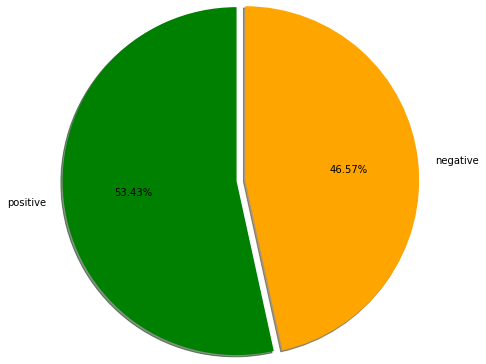

In [40]:
#https://stackoverflow.com/questions/39969089/how-to-create-pie-chart
#https://stackoverflow.com/questions/19852215/how-to-add-a-legend-to-matplotlib-pie-chart
label = ['positive','negative']
colors = ['green', 'orange'] 
plt.pie(wfh_df1['polarity'].value_counts(),labels=label,colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), autopct = '%1.2f%%',radius=2) 
plt.show()

<AxesSubplot:>

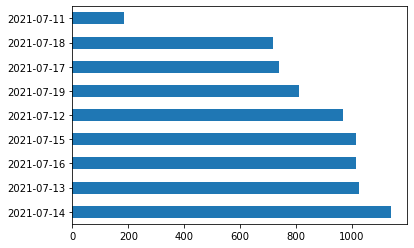

In [41]:
wfh_df1['date']=wfh_df1['tweet_posted_on'].dt.date
wfh_df1['date'].value_counts().plot(kind='barh')

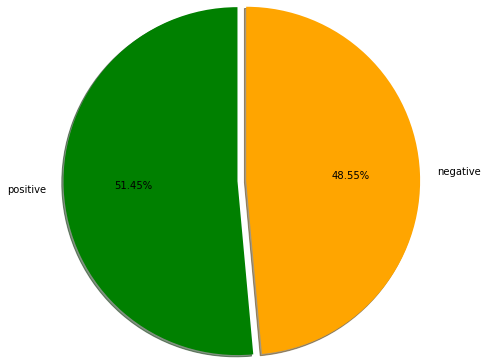

In [42]:
label = ['positive','negative']
colors = ['green', 'orange'] 
plt.pie(rw_df1['polarity'].value_counts(),labels=label,colors=colors, startangle=90, shadow = True,
        explode = (0, 0.1), autopct = '%1.2f%%',radius=2) 
plt.show()

<AxesSubplot:>

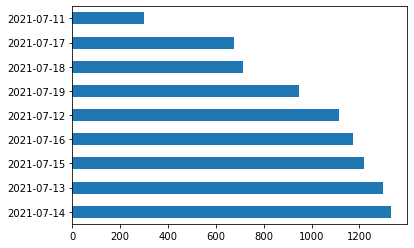

In [43]:
rw_df1['date']=rw_df1['tweet_posted_on'].dt.date
rw_df1['date'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='date'>

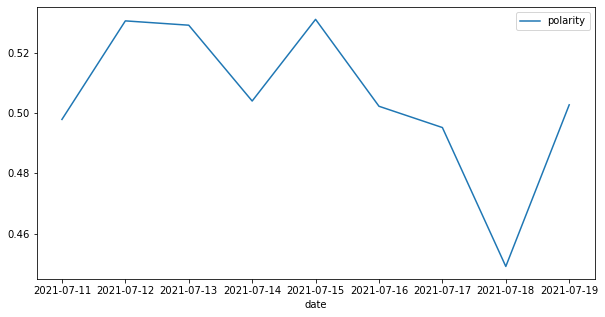

In [48]:
plt.figure(figsize=(10,5))
final_df_1['date'] = pd.to_datetime(final_df_1['tweet_posted_on']).dt.date
final_df_1.groupby(by='date')['polarity'].mean().plot(legend=True)

In [ ]:
X = final_df['cleaned_tweets']
y = final_df['polarity']

In [ ]:
# cv_bigrams = CountVectorizer(stop_words = 'english',ngram_range=(2,2))
# cv_bigrams.fit(final_df['cleaned_tweets'])
# bigrams_cv = cv_bigrams.transform(final_df['cleaned_tweets'])
# bigrams_df = pd.DataFrame(bigrams_cv.todense(),columns=cv_bigrams.get_feature_names())

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf_idf = TfidfVectorizer(ngram_range=(1,1),stop_words='english', min_df = 2)

In [ ]:
# tf_idf.fit(final_df['cleaned_tweets'])
# tfidf = tf_idf.transform(final_df['cleaned_tweets'])